# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', 155, 'display.max_rows', 1000)

### Getting all the data imported

In [3]:
data1 = pd.read_csv('..\Data\jetpack1.csv')

C:\Users\herat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,12,15,18,27,30,33,42,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data2 = pd.read_csv('..\Data\jetpack2.csv')

In [5]:
data3 = pd.read_csv('..\Data\jetpack3.csv')

### Concatenating dfs

In [6]:
data = pd.concat([data1, data2, data3], axis = 0)

In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
data.head()

,user_pseudo_id,m1_mission_completed,m1_mission_id,m1_mission_difficulty,m1_mission_stars_collected,m1_day_auto_increment,m1_lifetime_played_runs,m1_max_run_distance,m1_total_purchases_virtual,m1_total_ads_watched,m1_total_purchases_real,m1_geo_country,m1_days_played_in_month,m1_virtual_currency_balance,m1_event_timestamp,user_pseudo_id_1,m2_mission_completed,m2_mission_id,m2_mission_difficulty,m2_mission_stars_collected,m2_day_auto_increment,m2_lifetime_played_runs,m2_max_run_distance,m2_total_purchases_virtual,m2_total_ads_watched,m2_total_purchases_real,m2_geo_country,m2_days_played_in_month,m2_virtual_currency_balance,m2_event_timestamp,user_pseudo_id_2,m3_mission_completed,m3_mission_id,m3_mission_difficulty,m3_mission_stars_collected,m3_day_auto_increment,m3_lifetime_played_runs,m3_max_run_distance,m3_total_purchases_virtual,m3_total_ads_watched,m3_total_purchases_real,m3_geo_country,m3_days_played_in_month,m3_virtual_currency_balance,m3_event_timestamp,user_pseudo_id_3,m4_mission_completed,m4_mission_id,m4_mission_difficulty,m4_mission_stars_collected,m4_day_auto_increment,m4_lifetime_played_runs,m4_max_run_distance,m4_total_purchases_virtual,m4_total_ads_watched,m4_total_purchases_real,m4_geo_country,m4_days_played_in_month,m4_virtual_currency_balance,m4_event_timestamp,user_pseudo_id_4,m5_mission_completed,m5_mission_id,m5_mission_difficulty,m5_mission_stars_collected,m5_day_auto_increment,m5_lifetime_played_runs,m5_max_run_distance,m5_total_purchases_virtual,m5_total_ads_watched,m5_total_purchases_real,m5_geo_country,m5_days_played_in_month,m5_virtual_currency_balance,m5_event_timestamp,user_pseudo_id_5,m6_mission_completed,m6_mission_id,m6_mission_difficulty,m6_mission_stars_collected,m6_day_auto_increment,m6_lifetime_played_runs,m6_max_run_distance,m6_total_purchases_virtual,m6_total_ads_watched,m6_total_purchases_real,m6_geo_country,m6_days_played_in_month,m6_virtual_currency_balance,m6_event_timestamp,user_pseudo_id_6,m7_mission_completed,m7_mission_id,m7_mission_difficulty,m7_mission_stars_collected,m7_day_auto_increment,m7_lifetime_played_runs,m7_max_run_distance,m7_total_purchases_virtual,m7_total_ads_watched,m7_total_purchases_real,m7_geo_country,m7_days_played_in_month,m7_virtual_currency_balance,m8_event_timestamp,user_pseudo_id_7,m8_mission_completed,m8_mission_id,m8_mission_difficulty,m8_mission_stars_collected,m8_day_auto_increment,m8_lifetime_played_runs,m8_max_run_distance,m8_total_purchases_virtual,m8_total_ads_watched,m8_total_purchases_real,m8_geo_country,m8_days_played_in_month,m8_virtual_currency_balance,m8_event_timestamp_1,user_pseudo_id_8,m9_mission_completed,m9_mission_id,m9_mission_difficulty,m9_mission_stars_collected,m9_day_auto_increment,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m9_total_ads_watched,m9_total_purchases_real,m9_geo_country,m9_days_played_in_month,m9_virtual_currency_balance,m9_event_timestamp,user_pseudo_id_9,m10_mission_completed,m10_mission_id,m10_mission_difficulty,m10_mission_stars_collected,m10_day_auto_increment,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual,m10_total_ads_watched,m10_total_purchases_real,m10_geo_country,m10_days_played_in_month,m10_virtual_currency_balance,m10_event_timestamp,user_pseudo_id_10,target_max_day_played
0,15725157,3.0,Mission94,2.0,3.0,0.0,2.0,1763.0,2000.0,0.0,0.0,Honduras,0.0,5000.0,2022-03-02 15:46:04.025 UTC,15725157,4.0,Mission109,1.0,4.0,0.0,3.0,2266.0,2000.0,0.0,0.0,Honduras,0.0,4238.0,2022-03-02 15:46:51.889 UTC,15725157,5.0,Mission115,1.0,5.0,0.0,8.0,2266.0,3500.0,0.0,0.0,Honduras,0.0,3561.0,2022-03-02 15:54:49.526 UTC,15725157,6.0,Mission114,1.0,6.0,2.0,9.0,2266.0,3500.0,0.0,0.0,Honduras,2.0,4284.0,2022-03-05 17:52:48.383 UTC,15725157,7.0,Mission3,1.0,7.0,2.0,12.0,2266.0,7000.0,0.0,0.0,Honduras,2.0,1306.0,2022-03-05 17:56:06.473 UTC,15725157,8.0,Mission11,1.0,8.0,3.0,19.0,2585.0,7000.0,0.0,0.0,Honduras,3.0,2446.0,2022-03-14 02:00:06.716 UTC,15725157,9.0,Mission19,2.0,8.0,3.0,

### Cleaning data

In [9]:
data[data.duplicated()]

,user_pseudo_id,m1_mission_completed,m1_mission_id,m1_mission_difficulty,m1_mission_stars_collected,m1_day_auto_increment,m1_lifetime_played_runs,m1_max_run_distance,m1_total_purchases_virtual,m1_total_ads_watched,m1_total_purchases_real,m1_geo_country,m1_days_played_in_month,m1_virtual_currency_balance,m1_event_timestamp,user_pseudo_id_1,m2_mission_completed,m2_mission_id,m2_mission_difficulty,m2_mission_stars_collected,m2_day_auto_increment,m2_lifetime_played_runs,m2_max_run_distance,m2_total_purchases_virtual,m2_total_ads_watched,m2_total_purchases_real,m2_geo_country,m2_days_played_in_month,m2_virtual_currency_balance,m2_event_timestamp,user_pseudo_id_2,m3_mission_completed,m3_mission_id,m3_mission_difficulty,m3_mission_stars_collected,m3_day_auto_increment,m3_lifetime_played_runs,m3_max_run_distance,m3_total_purchases_virtual,m3_total_ads_watched,m3_total_purchases_real,m3_geo_country,m3_days_played_in_month,m3_virtual_currency_balance,m3_event_timestamp,user_pseudo_id_3,m4_mission_completed,m4_mission_id,m4_mission_difficulty,m4_mission_stars_collected,m4_day_auto_increment,m4_lifetime_played_runs,m4_max_run_distance,m4_total_purchases_virtual,m4_total_ads_watched,m4_total_purchases_real,m4_geo_country,m4_days_played_in_month,m4_virtual_currency_balance,m4_event_timestamp,user_pseudo_id_4,m5_mission_completed,m5_mission_id,m5_mission_difficulty,m5_mission_stars_collected,m5_day_auto_increment,m5_lifetime_played_runs,m5_max_run_distance,m5_total_purchases_virtual,m5_total_ads_watched,m5_total_purchases_real,m5_geo_country,m5_days_played_in_month,m5_virtual_currency_balance,m5_event_timestamp,user_pseudo_id_5,m6_mission_completed,m6_mission_id,m6_mission_difficulty,m6_mission_stars_collected,m6_day_auto_increment,m6_lifetime_played_runs,m6_max_run_distance,m6_total_purchases_virtual,m6_total_ads_watched,m6_total_purchases_real,m6_geo_country,m6_days_played_in_month,m6_virtual_currency_balance,m6_event_timestamp,user_pseudo_id_6,m7_mission_completed,m7_mission_id,m7_mission_difficulty,m7_mission_stars_collected,m7_day_auto_increment,m7_lifetime_played_runs,m7_max_run_distance,m7_total_purchases_virtual,m7_total_ads_watched,m7_total_purchases_real,m7_geo_country,m7_days_played_in_month,m7_virtual_currency_balance,m8_event_timestamp,user_pseudo_id_7,m8_mission_completed,m8_mission_id,m8_mission_difficulty,m8_mission_stars_collected,m8_day_auto_increment,m8_lifetime_played_runs,m8_max_run_distance,m8_total_purchases_virtual,m8_total_ads_watched,m8_total_purchases_real,m8_geo_country,m8_days_played_in_month,m8_virtual_currency_balance,m8_event_timestamp_1,user_pseudo_id_8,m9_mission_completed,m9_mission_id,m9_mission_difficulty,m9_mission_stars_collected,m9_day_auto_increment,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m9_total_ads_watched,m9_total_purchases_real,m9_geo_country,m9_days_played_in_month,m9_virtual_currency_balance,m9_event_timestamp,user_pseudo_id_9,m10_mission_completed,m10_mission_id,m10_mission_difficulty,m10_mission_stars_collected,m10_day_auto_increment,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual,m10_total_ads_watched,m10_total_purchases_real,m10_geo_country,m10_days_played_in_month,m10_virtual_currency_balance,m10_event_timestamp,user_pseudo_id_10,target_max_day_played
0,2683761,3.0,Mission115,1.0,3.0,0.0,1.0,3298.0,0.0,0.0,0.0,Brazil,0.0,5745.0,2022-02-13 19:51:48.694 UTC,2683761,4.0,Mission113,1.0,3.0,0.0,1.0,3298.0,0.0,0.0,0.0,Brazil,0.0,5745.0,2022-02-13 19:52:23.665 UTC,2683761,5.0,Mission109,1.0,3.0,0.0,1.0,3298.0,0.0,0.0,0.0,Brazil,0.0,5745.0,2022-02-13 19:52:28.163 UTC,2683761,6.0,Mission114,1.0,6.0,0.0,2.0,3298.0,0.0,0.0,0.0,Brazil,0.0,6346.0,2022-02-13 21:33:40.621 UTC,2683761,7.0,Mission3,1.0,7.0,0.0,3.0,3298.0,0.0,1.0,0.0,Brazil,0.0,8643.0,2022-02-14 01:22:16.965 UTC,2683761,8.0,Mission11,1.0,7.0,0.0,3.0,3298.0,0.0,1.0,0.0,Brazil,0.0,8643.0,2022-02-14 01:22:19.842 UTC,2683761,9.0,Mission6,1.0,9.0,0.0,4.0,3298.0,0.0,2.0,0.0,Brazil,0.0,10715

In [10]:
data.drop_duplicates(inplace = True)

### Checking id column

In [11]:
ids = data['user_pseudo_id'].value_counts()
ids = pd.DataFrame(ids).reset_index()
ids.columns = ['id', 'count']
ids.sort_values(by = 'count', ascending = False)

,id,count
0,72706784,19853
1,70089430,3
248,27601698,2
257,71760342,2
256,81679514,2
...,...,...
90244,39281465,1
90245,64889173,1
90246,81725463,1
90247,63295335,1


In [12]:
len(ids[ids['count'] > 1]) #There's 376 repeted ids with at least 2 reptetitions, so I'm not going to be using this column. 

376

### Aggregating targets

In [13]:
cols = list(data.columns)

In [14]:
real_purchases = []
virtual_purchases = []
ads = []

for i in cols:
    if 'total_purchases_real' in i:
        real_purchases.append(i)
    elif 'total_purchases_virtual' in i:
        virtual_purchases.append(i)
    elif 'total_ads' in i:
        ads.append(i)

In [15]:
data['real_purchases_sum'] = data[real_purchases].sum(1)
data['virtual_purchases_sum'] = data[virtual_purchases].sum(1)
data['ads_sum'] = data[ads].sum(1)

In [16]:
total_targets = data[['real_purchases_sum', 'virtual_purchases_sum', 'ads_sum']]

### Cleaning mission_id columns:

In [17]:
for i in cols:
    if 'mission_id' in i:        
        data[i] = data[i].astype('string')
        data[i] = data[i].str.replace('Mission', '')
        data[i] = pd.to_numeric(data[i], errors='coerce')

In [18]:
data

,user_pseudo_id,m1_mission_completed,m1_mission_id,m1_mission_difficulty,m1_mission_stars_collected,m1_day_auto_increment,m1_lifetime_played_runs,m1_max_run_distance,m1_total_purchases_virtual,m1_total_ads_watched,m1_total_purchases_real,m1_geo_country,m1_days_played_in_month,m1_virtual_currency_balance,m1_event_timestamp,user_pseudo_id_1,m2_mission_completed,m2_mission_id,m2_mission_difficulty,m2_mission_stars_collected,m2_day_auto_increment,m2_lifetime_played_runs,m2_max_run_distance,m2_total_purchases_virtual,m2_total_ads_watched,m2_total_purchases_real,m2_geo_country,m2_days_played_in_month,m2_virtual_currency_balance,m2_event_timestamp,user_pseudo_id_2,m3_mission_completed,m3_mission_id,m3_mission_difficulty,m3_mission_stars_collected,m3_day_auto_increment,m3_lifetime_played_runs,m3_max_run_distance,m3_total_purchases_virtual,m3_total_ads_watched,m3_total_purchases_real,m3_geo_country,m3_days_played_in_month,m3_virtual_currency_balance,m3_event_timestamp,user_pseudo_id_3,m4_mission_completed,m4_mission_id,m4_mission_difficulty,m4_mission_stars_collected,m4_day_auto_increment,m4_lifetime_played_runs,m4_max_run_distance,m4_total_purchases_virtual,m4_total_ads_watched,m4_total_purchases_real,m4_geo_country,m4_days_played_in_month,m4_virtual_currency_balance,m4_event_timestamp,user_pseudo_id_4,m5_mission_completed,m5_mission_id,m5_mission_difficulty,m5_mission_stars_collected,m5_day_auto_increment,m5_lifetime_played_runs,m5_max_run_distance,m5_total_purchases_virtual,m5_total_ads_watched,m5_total_purchases_real,m5_geo_country,m5_days_played_in_month,m5_virtual_currency_balance,m5_event_timestamp,user_pseudo_id_5,m6_mission_completed,m6_mission_id,m6_mission_difficulty,m6_mission_stars_collected,m6_day_auto_increment,m6_lifetime_played_runs,m6_max_run_distance,m6_total_purchases_virtual,m6_total_ads_watched,m6_total_purchases_real,m6_geo_country,m6_days_played_in_month,m6_virtual_currency_balance,m6_event_timestamp,user_pseudo_id_6,m7_mission_completed,m7_mission_id,m7_mission_difficulty,m7_mission_stars_collected,m7_day_auto_increment,m7_lifetime_played_runs,m7_max_run_distance,m7_total_purchases_virtual,m7_total_ads_watched,m7_total_purchases_real,m7_geo_country,m7_days_played_in_month,m7_virtual_currency_balance,m8_event_timestamp,user_pseudo_id_7,m8_mission_completed,m8_mission_id,m8_mission_difficulty,m8_mission_stars_collected,m8_day_auto_increment,m8_lifetime_played_runs,m8_max_run_distance,m8_total_purchases_virtual,m8_total_ads_watched,m8_total_purchases_real,m8_geo_country,m8_days_played_in_month,m8_virtual_currency_balance,m8_event_timestamp_1,user_pseudo_id_8,m9_mission_completed,m9_mission_id,m9_mission_difficulty,m9_mission_stars_collected,m9_day_auto_increment,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m9_total_ads_watched,m9_total_purchases_real,m9_geo_country,m9_days_played_in_month,m9_virtual_currency_balance,m9_event_timestamp,user_pseudo_id_9,m10_mission_completed,m10_mission_id,m10_mission_difficulty,m10_mission_stars_collected,m10_day_auto_increment,m10_lifetime_played_runs,m10_max_run_distance,m10_total_purchases_virtual,m10_total_ads_watched,m10_total_purchases_real,m10_geo_country,m10_days_played_in_month,m10_virtual_currency_balance,m10_event_timestamp,user_pseudo_id_10,target_max_day_played,real_purchases_sum,virtual_purchases_sum,ads_sum
0,15725157,3.0,94.0,2.0,3.0,0.0,2.0,1763.0,2000.0,0.0,0.0,Honduras,0.0,5000.0,2022-03-02 15:46:04.025 UTC,15725157,4.0,109.0,1.0,4.0,0.0,3.0,2266.0,2000.0,0.0,0.0,Honduras,0.0,4238.0,2022-03-02 15:46:51.889 UTC,15725157,5.0,115.0,1.0,5.0,0.0,8.0,2266.0,3500.0,0.0,0.0,Honduras,0.0,3561.0,2022-03-02 15:54:49.526 UTC,15725157,6.0,114.0,1.0,6.0,2.0,9.0,2266.0,3500.0,0.0,0.0,Honduras,2.0,4284.0,2022-03-05 17:52:48.383 UTC,15725157,7.0,3.0,1.0,7.0,2.0,12.0,2266.0,7000.0,0.0,0.0,Honduras,2.0,1306.0,2022-03-05 17:56:06.473 UTC,15725157,8.0,11.0,1.0,8.0,3.0,19.0,2585.0,7000.0,0.0,0.0,Honduras,3.0,2446.0,2022-03-14 02:00:06.716 UTC,15725157,9.0,19.

### Percentages of the total for each target

In [19]:
len(data[data['real_purchases_sum'] != 0])/(len(data))*100

1.116471399035148

In [20]:
len(data[data['virtual_purchases_sum'] != 0])/(len(data))*100

73.32804962095106

In [21]:
len(data[data['ads_sum'] != 0])/(len(data))*100

72.9552033080634

### Checkin NaNs

In [22]:
nas = data.isna().sum()

In [23]:
nas = pd.DataFrame(nas, columns = ['na'])
nas

,na
user_pseudo_id,0
m1_mission_completed,19853
m1_mission_id,20294
m1_mission_difficulty,19853
m1_mission_stars_collected,19853
m1_day_auto_increment,19854
m1_lifetime_played_runs,20658
m1_max_run_distance,20658
m1_total_purchases_virtual,20675
m1_total_ads_watched,20680


In [24]:
nas[nas['na'] > 0].sort_values(by = 'na', ascending = False)

,na
m1_total_ads_watched,20680
m1_total_purchases_real,20680
m1_total_purchases_virtual,20675
m1_days_played_in_month,20659
m1_lifetime_played_runs,20658
m1_max_run_distance,20658
m1_virtual_currency_balance,20658
m1_mission_id,20294
m1_geo_country,19995
m2_total_ads_watched,19877


In [25]:
data.columns

Index(['user_pseudo_id', 'm1_mission_completed', 'm1_mission_id',
       'm1_mission_difficulty', 'm1_mission_stars_collected',
       'm1_day_auto_increment', 'm1_lifetime_played_runs',
       'm1_max_run_distance', 'm1_total_purchases_virtual',
       'm1_total_ads_watched',
       ...
       'm10_total_purchases_real', 'm10_geo_country',
       'm10_days_played_in_month', 'm10_virtual_currency_balance',
       'm10_event_timestamp', 'user_pseudo_id_10', 'target_max_day_played',
       'real_purchases_sum', 'virtual_purchases_sum', 'ads_sum'],
      dtype='object', length=155)

In [26]:
target = data['target_max_day_played'].value_counts()

In [27]:
target = pd.DataFrame(target).reset_index()

In [28]:
target.columns = ['max_days', 'count']

In [29]:
target = target.sort_values(by = 'max_days', ascending = False)
target

,max_days,count
120,10000005,1
118,10000004,1
93,10000001,6
73,10000000,21
69,9999999,29
116,592,1
114,538,1
111,220,1
109,184,1
122,159,1


In [30]:
droplist = []
for i in target['max_days']:
    if i > 1000:
        droplist.append(i)

In [31]:
data = data[~data['target_max_day_played'].isin(droplist)]

In [32]:
%store data

Stored 'data' (DataFrame)


In [33]:
data.to_csv('..\\project_data\\first_cleaning.csv')

In [34]:
droplist2 = []
for i in cols:
    if 'mission_completed' in i:
        droplist2.append(i)

In [35]:
data.drop(droplist2, axis = 1, inplace = True)

C:\Users\herat\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
for i in cols:
    if 'pseudo_id' in i:
        data.drop(i, axis = 1, inplace = True)

In [37]:
for i in cols:
    if 'timestamp' in i:
        data.drop(i, axis = 1, inplace = True)

In [38]:
cols = list(data.columns)
cols

['m1_mission_id',
 'm1_mission_difficulty',
 'm1_mission_stars_collected',
 'm1_day_auto_increment',
 'm1_lifetime_played_runs',
 'm1_max_run_distance',
 'm1_total_purchases_virtual',
 'm1_total_ads_watched',
 'm1_total_purchases_real',
 'm1_geo_country',
 'm1_days_played_in_month',
 'm1_virtual_currency_balance',
 'm2_mission_id',
 'm2_mission_difficulty',
 'm2_mission_stars_collected',
 'm2_day_auto_increment',
 'm2_lifetime_played_runs',
 'm2_max_run_distance',
 'm2_total_purchases_virtual',
 'm2_total_ads_watched',
 'm2_total_purchases_real',
 'm2_geo_country',
 'm2_days_played_in_month',
 'm2_virtual_currency_balance',
 'm3_mission_id',
 'm3_mission_difficulty',
 'm3_mission_stars_collected',
 'm3_day_auto_increment',
 'm3_lifetime_played_runs',
 'm3_max_run_distance',
 'm3_total_purchases_virtual',
 'm3_total_ads_watched',
 'm3_total_purchases_real',
 'm3_geo_country',
 'm3_days_played_in_month',
 'm3_virtual_currency_balance',
 'm4_mission_id',
 'm4_mission_difficulty',
 'm4_mis

### Getting original target

In [39]:
target = data[['target_max_day_played']]

In [40]:
data.dropna(axis = 0, inplace = True)

C:\Users\herat\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [41]:
data.isna().sum()

m1_mission_id                   0
m1_mission_difficulty           0
m1_mission_stars_collected      0
m1_day_auto_increment           0
m1_lifetime_played_runs         0
m1_max_run_distance             0
m1_total_purchases_virtual      0
m1_total_ads_watched            0
m1_total_purchases_real         0
m1_geo_country                  0
m1_days_played_in_month         0
m1_virtual_currency_balance     0
m2_mission_id                   0
m2_mission_difficulty           0
m2_mission_stars_collected      0
m2_day_auto_increment           0
m2_lifetime_played_runs         0
m2_max_run_distance             0
m2_total_purchases_virtual      0
m2_total_ads_watched            0
m2_total_purchases_real         0
m2_geo_country                  0
m2_days_played_in_month         0
m2_virtual_currency_balance     0
m3_mission_id                   0
m3_mission_difficulty           0
m3_mission_stars_collected      0
m3_day_auto_increment           0
m3_lifetime_played_runs         0
m3_max_run_dis

In [42]:
data.shape

(267245, 124)

### Exploring different columns

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
m1_mission_id,267245.0,113.125465,4.788154e+00,3.0,113.0,115.0,115.0,1.220000e+02
m1_mission_difficulty,267245.0,1.047803,2.134013e-01,1.0,1.0,1.0,1.0,3.000000e+00
m1_mission_stars_collected,267245.0,2.828547,3.467298e+00,0.0,3.0,3.0,3.0,1.759000e+03
m1_day_auto_increment,267245.0,0.202533,5.308777e-01,-1.0,0.0,0.0,0.0,3.500000e+01
m1_lifetime_played_runs,267245.0,1.213572,1.532530e+00,0.0,1.0,1.0,1.0,4.540000e+02
m1_max_run_distance,267245.0,1471.578207,5.256240e+02,0.0,1173.0,1345.0,1657.0,2.464800e+04
m1_total_purchases_virtual,267245.0,26451.797422,3.306831e+05,0.0,0.0,0.0,1500.0,6.119500e+06
m1_total_ads_watched,267245.0,0.065816,6.522779e-01,0.0,0.0,0.0,0.0,1.870000e+02
m1_total_purchases_real,267245.0,0.011918,4.648891e-01,0.0,0.0,0.0,0.0,7.393000e+01
m1_days_played_in_month,267245.0,0.154704,4.313401e-01,-1.0,0.0,0.0,0.0,1.400000e+01


### Getting smaller datasets for each mission

In [44]:
dataset1 = []

for i in cols:
    if ('m1_' in i) | ('target_max_day_played' in i):
        dataset1.append(i)
dataset1 = data[dataset1].reset_index()
dataset1.columns

Index(['index', 'm1_mission_id', 'm1_mission_difficulty',
       'm1_mission_stars_collected', 'm1_day_auto_increment',
       'm1_lifetime_played_runs', 'm1_max_run_distance',
       'm1_total_purchases_virtual', 'm1_total_ads_watched',
       'm1_total_purchases_real', 'm1_geo_country', 'm1_days_played_in_month',
       'm1_virtual_currency_balance', 'target_max_day_played'],
      dtype='object')

In [45]:
dataset2 = []

for i in cols:
    if ('m2' in i) | ('target_max_day_played' in i):
        dataset2.append(i)
dataset2 = data[dataset2].reset_index()
dataset2.columns

Index(['index', 'm2_mission_id', 'm2_mission_difficulty',
       'm2_mission_stars_collected', 'm2_day_auto_increment',
       'm2_lifetime_played_runs', 'm2_max_run_distance',
       'm2_total_purchases_virtual', 'm2_total_ads_watched',
       'm2_total_purchases_real', 'm2_geo_country', 'm2_days_played_in_month',
       'm2_virtual_currency_balance', 'target_max_day_played'],
      dtype='object')

In [46]:
dataset3 = []

for i in cols:
    if ('m3' in i) | ('target_max_day_played' in i):
        dataset3.append(i)
dataset3 = data[dataset3].reset_index()
dataset3.shape

(267245, 14)

In [47]:
dataset4 = []

for i in cols:
    if ('m4' in i) | ('target_max_day_played' in i):
        dataset4.append(i)
dataset4 = data[dataset4].reset_index()
dataset4.shape

(267245, 14)

In [48]:
dataset5 = []

for i in cols:
    if ('m5' in i) | ('target_max_day_played' in i):
        dataset5.append(i)
dataset5 = data[dataset5].reset_index()
dataset5.shape

(267245, 14)

In [49]:
dataset6 = []

for i in cols:
    if ('m6' in i) | ('target_max_day_played' in i):
        dataset6.append(i)
dataset6 = data[dataset6].reset_index()
dataset6.shape

(267245, 14)

In [50]:
dataset7 = []

for i in cols:
    if ('m7' in i) | ('target_max_day_played' in i):
        dataset7.append(i)
dataset7 = data[dataset7].reset_index()
dataset7.shape

(267245, 14)

In [51]:
dataset8 = []

for i in cols:
    if ('m8' in i) | ('target_max_day_played' in i):
        dataset8.append(i)
dataset8 = data[dataset8].reset_index()
dataset8.shape

(267245, 14)

In [52]:
dataset9 = []

for i in cols:
    if ('m9' in i) | ('target_max_day_played' in i):
        dataset9.append(i)
dataset9 = data[dataset9].reset_index()
dataset9.shape

(267245, 14)

In [53]:
dataset10 = []

for i in cols:
    if ('m10' in i) | ('target_max_day_played' in i):
        dataset10.append(i)
dataset10 = data[dataset10].reset_index()
dataset10.shape

(267245, 14)

In [54]:
dataset9.head()

,index,m9_mission_id,m9_mission_difficulty,m9_mission_stars_collected,m9_day_auto_increment,m9_lifetime_played_runs,m9_max_run_distance,m9_total_purchases_virtual,m9_total_ads_watched,m9_total_purchases_real,m9_geo_country,m9_days_played_in_month,m9_virtual_currency_balance,target_max_day_played
0,0,86.0,2.0,12.0,3.0,21.0,2585.0,7000.0,0.0,0.0,Honduras,3.0,3322.0,4
1,1,19.0,2.0,11.0,0.0,4.0,3790.0,0.0,2.0,0.0,Belgium,0.0,9379.0,4
2,2,12.0,2.0,13.0,2.0,12.0,3581.0,1000.0,8.0,0.0,Vietnam,2.0,8657.0,2
3,3,86.0,2.0,13.0,1.0,15.0,2261.0,5500.0,0.0,0.0,Taiwan,1.0,2055.0,2
4,4,12.0,2.0,13.0,1.0,26.0,2538.0,1500.0,0.0,0.0,Bangladesh,1.0,11848.0,5


In [55]:
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9, dataset10]

In [56]:
x = 1
for i in datasets:
    i['mission_played'] = x
    x += 1

In [57]:
dataset1.columns

Index(['index', 'm1_mission_id', 'm1_mission_difficulty',
       'm1_mission_stars_collected', 'm1_day_auto_increment',
       'm1_lifetime_played_runs', 'm1_max_run_distance',
       'm1_total_purchases_virtual', 'm1_total_ads_watched',
       'm1_total_purchases_real', 'm1_geo_country', 'm1_days_played_in_month',
       'm1_virtual_currency_balance', 'target_max_day_played',
       'mission_played'],
      dtype='object')

In [58]:
for i in datasets:
        i.columns = ['pseudo_id', 'mission_id', 'mission_difficulty',
       'mission_stars_collected', 'day_auto_increment',
       'lifetime_played_runs', 'max_run_distance',
       'total_purchases_virtual', 'total_ads_watched',
       'total_purchases_real', 'geo_country', 'days_played_in_month',
       'virtual_currency_balance', 'target_max_day_played',
       'mission_played']

In [59]:
dataset1.dtypes

pseudo_id                     int64
mission_id                  float64
mission_difficulty          float64
mission_stars_collected     float64
day_auto_increment          float64
lifetime_played_runs        float64
max_run_distance            float64
total_purchases_virtual     float64
total_ads_watched           float64
total_purchases_real        float64
geo_country                  object
days_played_in_month        float64
virtual_currency_balance    float64
target_max_day_played         int64
mission_played                int64
dtype: object

In [60]:
clean_data = pd.concat(datasets, axis = 0)

In [61]:
clean_data['mission_played'].value_counts()

1     267245
2     267245
3     267245
4     267245
5     267245
6     267245
7     267245
8     267245
9     267245
10    267245
Name: mission_played, dtype: int64

In [62]:
cols = list(clean_data.columns)
cols.remove('geo_country')

In [63]:
for i in cols:
    clean_data[i] = clean_data[i].astype(int)

In [64]:
clean_data.dtypes

pseudo_id                    int32
mission_id                   int32
mission_difficulty           int32
mission_stars_collected      int32
day_auto_increment           int32
lifetime_played_runs         int32
max_run_distance             int32
total_purchases_virtual      int32
total_ads_watched            int32
total_purchases_real         int32
geo_country                 object
days_played_in_month         int32
virtual_currency_balance     int32
target_max_day_played        int32
mission_played               int32
dtype: object

In [65]:
clean_data.sort_values(by = ['pseudo_id', 'mission_played'])

,pseudo_id,mission_id,mission_difficulty,mission_stars_collected,day_auto_increment,lifetime_played_runs,max_run_distance,total_purchases_virtual,total_ads_watched,total_purchases_real,geo_country,days_played_in_month,virtual_currency_balance,target_max_day_played,mission_played
0,0,94,2,3,0,2,1763,2000,0,0,Honduras,0,5000,4,1
0,0,109,1,4,0,3,2266,2000,0,0,Honduras,0,4238,4,2
0,0,115,1,5,0,8,2266,3500,0,0,Honduras,0,3561,4,3
0,0,114,1,6,2,9,2266,3500,0,0,Honduras,2,4284,4,4
0,0,3,1,7,2,12,2266,7000,0,0,Honduras,2,1306,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172244,96733,12,2,12,0,7,1700,0,0,0,Nigeria,0,5665,1,9
267244,96733,86,2,12,1,14,2801,5500,14,0,United Kingdom,1,12680,5,9
77005,96733,12,2,14,0,9,3298,15000,7,0,Brazil,0,3521,0,10
172244,96733,86,2,14,0,7,1700,0,0,0,Nigeria,0,5465,1,10


In [66]:
clean_data = clean_data[clean_data['day_auto_increment'] != -1]

In [67]:
clean_data = clean_data[clean_data['days_played_in_month'] != -1]

In [68]:
targets = clean_data.pivot_table(index = 'pseudo_id', values = ['total_purchases_real', 'total_ads_watched', 'total_purchases_virtual'], aggfunc = 'sum').reset_index()

In [69]:
targets.columns

Index(['pseudo_id', 'total_ads_watched', 'total_purchases_real',
       'total_purchases_virtual'],
      dtype='object')

In [70]:
targets.columns = ['pseudo_id', 'sum_ads', 'sum_purchases_real',
       'sum_purchases_virtual']

In [71]:
clean_data = clean_data.merge(targets, on = 'pseudo_id')

In [72]:
%store clean_data

Stored 'clean_data' (DataFrame)


In [73]:
clean_data.to_csv('..\project_data\clean_data.csv')

In [74]:
cor1 = clean_data.corr()

In [75]:
clean_data1 = clean_data.sample(frac = 0.6)

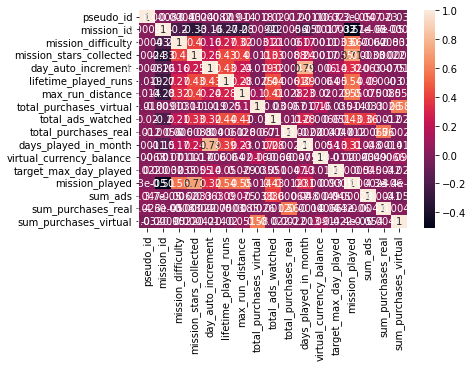

In [76]:
sns.heatmap(cor1, annot=True)
plt.show()

In [77]:
X = clean_data.drop(['sum_purchases_real', 'geo_country', 'total_purchases_real'],axis=1)
y1 = clean_data['sum_purchases_real']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y1)

In [79]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [80]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [81]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [82]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [83]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [84]:
from sklearn.metrics import mean_squared_error as sqrt

In [85]:
LR = LinearRegression().fit(X_train,y_train)

In [86]:
score = LR.score(X_test, y_test)
score

0.000732136849528553

In [87]:
from xgboost import XGBRegressor
import xgboost as xgb

model = XGBRegressor(
    max_depth=10,
    n_estimators=200,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)


In [ ]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)


C:\Users\herat\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\herat\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:8.73085	validation_1-rmse:8.20932
[1]	validation_0-rmse:8.25745	validation_1-rmse:7.85315
[2]	validation_0-rmse:7.93848	validation_1-rmse:7.62973
[3]	validation_0-rmse:7.49323	validation_1-rmse:7.23825
[4]	validation_0-rmse:7.17857	validation_1-rmse:7.00675
[5]	validation_0-rmse:6.78138	validation_1-rmse:6.63179
[6]	validation_0-rmse:6.63214	validation_1-rmse:6.47624
[7]	validation_0-rmse:6.32747	validation_1-rmse:6.20741
[8]	validation_0-rmse:6.16754	validation_1-rmse:6.05951
[9]	validation_0-rmse:5.92577	validation_1-rmse:5.87706
[10]	validation_0-rmse:5.66755	validation_1-rmse:5.62967
[11]	validation_0-rmse:5.43346	validation_1-rmse:5.41542
[12]	validation_0-rmse:5.37120	validation_1-rmse:5.35095
[13]	validation_0-rmse:5.18084	validation_1-rmse:5.18098
[14]	validation_0-rmse:5.13381	validation_1-rmse:5.14461


In [ ]:
xgb.plot_importance(model)

In [ ]:
X = clean_data1.drop(['total_purchases_virtual', 'sum_purchases_virtual', 'geo_country'],axis=1)
y2 = clean_data1['sum_purchases_virtual']

X_train, X_test, y_train, y_test = train_test_split(X,y2)

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

X_train = np.concatenate((numericals_train_standardized,categoricals_train),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test),axis=1)

LR = LinearRegression().fit(X_train,y_train)

score = LR.score(X_test, y_test)
score

In [ ]:
clean_data1

In [ ]:
X = clean_data.drop(['target_max_day_played', 'geo_country'],axis=1)
y4 = clean_data['target_max_day_played']

X_train, X_test, y_train, y_test = train_test_split(X,y4)

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

X_train = numericals_train_standardized
X_test = numericals_test_standardized

LR = LinearRegression().fit(X_train,y_train)

score = LR.score(X_test, y_test)
score

In [ ]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(LR, n_features_to_select = 5, verbose = False)
rfe.fit(X_train, y_train)

In [ ]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
df = df[df['Rank']==1]
df

# Web Scraping

In [ ]:
# !pip install google-play-scraper

In [ ]:
from google_play_scraper import app

result = app(
    'com.halfbrick.jetpackjoyride',
    lang='en', # defaults to 'en'
    country='es' # defaults to 'us'
)

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.halfbrick.jetpackjoyride',
    lang='en', # defaults to 'en'
    country='es', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count= 5000#, # defaults to 100
    #filter_score_with=5 # defaults to None(means all score)
)


In [ ]:
result

In [ ]:
scores = []

for i in range(len(result)):
    scores.append(result[i]['score'])
    

In [ ]:
dates = []

for i in range(len(result)):
    dates.append(result[i]['at'])
    

In [ ]:
reviews = pd.DataFrame(dates, scores).reset_index()

In [ ]:
reviews.columns = ['score', 'date']

In [ ]:
reviews['month'] = pd.DatetimeIndex(reviews['date']).month

In [ ]:
reviews.dtypes

In [ ]:
reviews.month.value_counts()

In [ ]:
reviews['year'] = pd.DatetimeIndex(reviews['date']).year

In [ ]:
reviews.year.value_counts()

In [ ]:
%store reviews

In [ ]:
reviews

In [ ]:
reviews.to_csv('../project_data/reviews.csv')